<a href="https://colab.research.google.com/github/Csiath/cienc-dados/blob/main/telco_cstm_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio**

Ao analisar o Dataset Telco customer churn, contém informações sobre os clientes de uma empresa de telecomunicações fictícia e se eles cancelaram o produto ou serviço, o chamado de churn rate que é uma métrica que aponta o número de clientes que deixaram de fazer negócios com a empresa em um determinado período de tempo ou não cancelaram o serviço ou serviço com a empresa.

O que temos:
Temos 1 base de dados com informações dos clientes.

Referência: https://www.kaggle.com/datasets/alfathterry/telco-customer-churn-11-1-3?select=telco.csv

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Etapas:

**Passo 1:** Importar a base de dados

**Passo 2:** Visualizar e tratar a base de dados

**Passo 3:** Analisar a base de dados, verificar, "dar uma olhada nos dados"

**Passo 4:** Construir a analise para identificar o motivo do cancelamento

Identificar o motivo ou os principais motivos de os clientes cancelarem os serviços para com a empresa

In [ ]:
tabela = pd.read_csv("/content/drive/MyDrive/Programacao_de_Computadores/Datasets/telco.csv", encoding="latin1")

display(tabela)

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,...,0,1639.44,3039.53,5,Stayed,No,45,5306,NaN,NaN
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,...,0,865.20,2807.47,3,Stayed,No,59,2140,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,...,0,2135.52,9453.04,4,Stayed,No,71,5560,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,...,0,0.00,319.21,4,Stayed,No,59,2793,NaN,NaN


In [ ]:
tabela = tabela.dropna()
display(tabela.info()) #df.info()

display(tabela.describe().round(1))

<class 'pandas.core.frame.DataFrame'>
Index: 757 entries, 1 to 2534
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        757 non-null    object 
 1   Gender                             757 non-null    object 
 2   Age                                757 non-null    int64  
 3   Under 30                           757 non-null    object 
 4   Senior Citizen                     757 non-null    object 
 5   Married                            757 non-null    object 
 6   Dependents                         757 non-null    object 
 7   Number of Dependents               757 non-null    int64  
 8   Country                            757 non-null    object 
 9   State                              757 non-null    object 
 10  City                               757 non-null    object 
 11  Zip Code                           757 non-null    int64  
 12

None

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,757.0,757.0,757.0,757.0,757.0,757.0,757.0,757.0,757.0,757.0,757.0,757.0,757.0,757.0,757.0,757.0,757.0,757.0,757.0
mean,49.3,0.1,93422.7,36.0,-119.6,23686.9,0.5,18.2,22.8,24.8,77.5,1602.5,1.8,7.1,435.1,2042.8,1.8,81.7,4178.5
std,17.7,0.4,1802.3,2.4,2.1,20895.9,1.1,20.3,15.7,18.6,21.5,1981.0,7.9,24.3,656.5,2535.0,0.8,9.3,1192.5
min,19.0,0.0,90001.0,32.6,-124.2,11.0,0.0,1.0,0.0,2.0,23.4,23.4,0.0,0.0,0.0,23.4,1.0,65.0,2003.0
25%,33.0,0.0,92121.0,33.9,-121.5,3284.0,0.0,2.0,8.9,12.0,69.0,145.2,0.0,0.0,29.8,184.3,1.0,73.0,3099.0
50%,50.0,0.0,93251.0,35.5,-119.2,21418.0,0.0,9.0,22.1,21.0,80.3,734.4,0.0,0.0,134.0,886.1,2.0,82.0,4330.0
75%,64.0,0.0,95220.0,37.9,-117.8,38244.0,1.0,29.0,35.9,29.0,94.4,2375.4,0.0,0.0,534.3,2995.1,2.0,91.0,5153.0
max,80.0,4.0,96150.0,42.0,-115.4,101215.0,9.0,72.0,50.0,85.0,116.2,8127.6,49.1,150.0,3508.8,11084.8,3.0,96.0,6452.0


In [ ]:
qtde_churn_score = tabela["Churn Score"].value_counts()

qtde_churn_score_perc = tabela["Churn Score"].value_counts(normalize=True) #compara em relação ao todo;

display(qtde_churn_score)
display(qtde_churn_score_perc)

Churn Score
91    99
90    45
89    32
76    29
73    27
69    26
65    25
87    24
81    24
93    23
82    23
80    22
71    21
70    20
75    19
74    19
67    19
66    19
72    19
86    19
94    19
78    18
92    18
95    18
85    17
83    17
84    17
77    17
79    16
68    16
88    15
96    15
Name: count, dtype: int64

Churn Score
91    0.130779
90    0.059445
89    0.042272
76    0.038309
73    0.035667
69    0.034346
65    0.033025
87    0.031704
81    0.031704
93    0.030383
82    0.030383
80    0.029062
71    0.027741
70    0.026420
75    0.025099
74    0.025099
67    0.025099
66    0.025099
72    0.025099
86    0.025099
94    0.025099
78    0.023778
92    0.023778
95    0.023778
85    0.022457
83    0.022457
84    0.022457
77    0.022457
79    0.021136
68    0.021136
88    0.019815
96    0.019815
Name: proportion, dtype: float64

In [ ]:
qtde_reason = tabela["Churn Reason"].value_counts()

qtde_reason_perc = tabela["Churn Reason"].value_counts(normalize=True) #compara em relação ao todo;

display(qtde_reason)
display(qtde_reason_perc)

Churn Reason
Competitor had better devices                133
Competitor made better offer                 126
Attitude of support person                    84
Competitor offered more data                  58
Attitude of service provider                  49
Competitor offered higher download speeds     46
Don't know                                    41
Network reliability                           31
Product dissatisfaction                       30
Price too high                                29
Service dissatisfaction                       23
Moved                                         19
Extra data charges                            17
Limited range of services                     16
Lack of affordable download/upload speed      15
Long distance charges                         14
Poor expertise of online support              11
Lack of self-service on Website               11
Deceased                                       2
Poor expertise of phone support                2
Name: c

Churn Reason
Competitor had better devices                0.175694
Competitor made better offer                 0.166446
Attitude of support person                   0.110964
Competitor offered more data                 0.076618
Attitude of service provider                 0.064729
Competitor offered higher download speeds    0.060766
Don't know                                   0.054161
Network reliability                          0.040951
Product dissatisfaction                      0.039630
Price too high                               0.038309
Service dissatisfaction                      0.030383
Moved                                        0.025099
Extra data charges                           0.022457
Limited range of services                    0.021136
Lack of affordable download/upload speed     0.019815
Long distance charges                        0.018494
Poor expertise of online support             0.014531
Lack of self-service on Website              0.014531
Deceased       

In [ ]:
for coluna in tabela:
  grafico = px.histogram(tabela, x = "Age", color = "Churn Category")

  grafico.show()

In [ ]:
for coluna in tabela: #percorre cada coluna da tabela e faz o que está dentro do loop
  print(coluna)
  #grafico = px.histogram(tabela, x = "Idade", color = "Categoria")

  #grafico.show()

Customer ID
Gender
Age
Under 30
Senior Citizen
Married
Dependents
Number of Dependents
Country
State
City
Zip Code
Latitude
Longitude
Population
Quarter
Referred a Friend
Number of Referrals
Tenure in Months
Offer
Phone Service
Avg Monthly Long Distance Charges
Multiple Lines
Internet Service
Internet Type
Avg Monthly GB Download
Online Security
Online Backup
Device Protection Plan
Premium Tech Support
Streaming TV
Streaming Movies
Streaming Music
Unlimited Data
Contract
Paperless Billing
Payment Method
Monthly Charge
Total Charges
Total Refunds
Total Extra Data Charges
Total Long Distance Charges
Total Revenue
Satisfaction Score
Customer Status
Churn Label
Churn Score
CLTV
Churn Category
Churn Reason


In [ ]:
for coluna in tabela:
    grafico = px.histogram(tabela, x=coluna, color="Satisfaction Score")
    grafico.show()

In [ ]:
df = tabela[['Gender', 'Age', 'Number of Dependents', 'State',
                   'Customer Status',	'Churn Label',	'Churn Score',	'CLTV', 'Churn Category',	'Churn Reason', 'Satisfaction Score']]  # Seleciona as colunas

In [ ]:
df['Churn Label'] = df['Churn Label'].replace({'No': 0, 'Yes': 1})

display(df)

<ipython-input-15-76ee633f21f5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Gender,Age,Number of Dependents,State,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason,Satisfaction Score
1,0,74,1,California,Churned,1,69,5302,Competitor,Competitor made better offer,3
2,1,71,3,California,Churned,1,81,3179,Competitor,Competitor made better offer,2
3,0,78,1,California,Churned,1,88,5337,Dissatisfaction,Limited range of services,2
4,0,80,1,California,Churned,1,67,2793,Price,Extra data charges,2
5,0,72,1,California,Churned,1,95,4638,Competitor,Competitor had better devices,1
...,...,...,...,...,...,...,...,...,...,...,...
2510,1,40,3,California,Churned,1,70,2688,Competitor,Competitor had better devices,1
2518,1,34,0,California,Churned,1,91,4794,Competitor,Competitor had better devices,2
2529,1,47,0,California,Churned,1,78,5701,Competitor,Competitor offered more data,2
2532,1,44,0,California,Churned,1,69,4581,Competitor,Competitor offered higher download speeds,3


In [ ]:
#df['Gender'] = df['Gender'].astype('category').cat.codes

#display(df)

<ipython-input-13-e226f1c2f029>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Gender,Age,Number of Dependents,State,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason,Satisfaction Score
1,0,74,1,California,Churned,1,69,5302,Competitor,Competitor made better offer,3
2,1,71,3,California,Churned,1,81,3179,Competitor,Competitor made better offer,2
3,0,78,1,California,Churned,1,88,5337,Dissatisfaction,Limited range of services,2
4,0,80,1,California,Churned,1,67,2793,Price,Extra data charges,2
5,0,72,1,California,Churned,1,95,4638,Competitor,Competitor had better devices,1
...,...,...,...,...,...,...,...,...,...,...,...
2510,1,40,3,California,Churned,1,70,2688,Competitor,Competitor had better devices,1
2518,1,34,0,California,Churned,1,91,4794,Competitor,Competitor had better devices,2
2529,1,47,0,California,Churned,1,78,5701,Competitor,Competitor offered more data,2
2532,1,44,0,California,Churned,1,69,4581,Competitor,Competitor offered higher download speeds,3


In [ ]:
df

,Gender,Age,Number of Dependents,State,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason,Satisfaction Score
1,0,74,1,California,Churned,1,69,5302,Competitor,Competitor made better offer,3
2,1,71,3,California,Churned,1,81,3179,Competitor,Competitor made better offer,2
3,0,78,1,California,Churned,1,88,5337,Dissatisfaction,Limited range of services,2
4,0,80,1,California,Churned,1,67,2793,Price,Extra data charges,2
5,0,72,1,California,Churned,1,95,4638,Competitor,Competitor had better devices,1
...,...,...,...,...,...,...,...,...,...,...,...
2510,1,40,3,California,Churned,1,70,2688,Competitor,Competitor had better devices,1
2518,1,34,0,California,Churned,1,91,4794,Competitor,Competitor had better devices,2
2529,1,47,0,California,Churned,1,78,5701,Competitor,Competitor offered more data,2
2532,1,44,0,California,Churned,1,69,4581,Competitor,Competitor offered higher download speeds,3


NameError: name 'x' is not defined

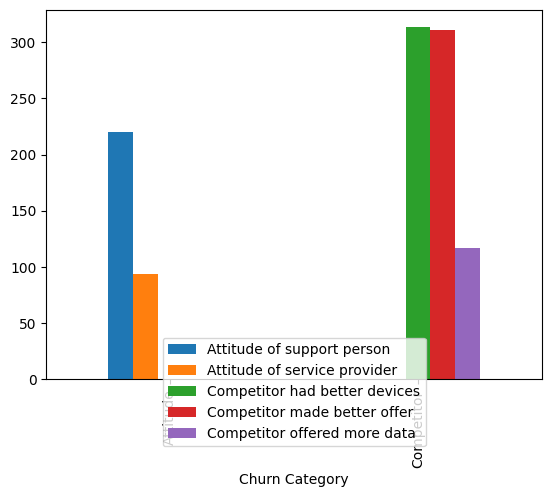

<Figure size 1000x600 with 0 Axes>

In [ ]:
# @title Top Churn Reasons by Churn Category

df.groupby("Churn Category")["Churn Reason"].value_counts().head(5).unstack().plot(kind = "bar")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2))
plt.plot(x,y)
plt.show()

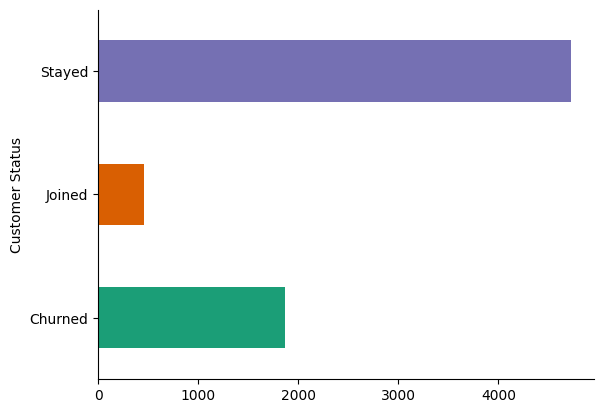

In [ ]:
# @title Customer Status

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Customer Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Problema**

Com base na análise dos dados identificamos o aumento da taxa de chrum devido a insatisfação dos cliente para com o produto/serviço.

# **Resolução do Problema**

## Dados descobertos

*  A maioria dos clientes opta pelo
cancelamento devido as propostas de seus concorrentes;

* Má conduta dos colaboradores estão dentre as razões de descontentamento do cliente para com a empresa;

* Clientes que optam pelo contrato mensal tem uma chance de 50% de não renovarem o mesmo;

* Preço é um dos motivos para o cancelamneto do produto/serviço.




# **Plano de ação estratégica**

* Realizar uma análise competitiva para entender os pontos fortes e fracos de seus concorrentes, e formalizar uma proposta de valor para se destacar perante a eles e atender a necessidade do consumidor;

* Implementar programas de fidelidade para incentivar a permanência dos clientes;

* Investir em treinamento e desenvolvimento dos colaboradores, estabelecendo um código de conduta  e novas políticas de atendimento ao cliente;

* Oferecer descontos e/ou benefícios adicionais para contratos de longo prazo;

* Manter um relacionamento direto com o cliente, com um canal direto, colhendo seus feedbacks para entender suas necessidades e preocupações e oferecer melhorias;

* Oferecer diferentes níveis de preços com novos pacotes de serviços;

* Ser transparente com o cliente em relação as taxas, cancelamentos de contratos e prazos para evitar surpresas indesejadas;
